# Table Of Contents:
* [Simple Sine Wave Graph](#sine)
* [Subplots](#subplots)
* [Interactive Graph With ipywidgets](#ipyw)
* [Configuring Plots](#config)
* [Graphing with Pandas](#pandas)
* [Cartopy](#cartopy)
* [Time Series](#timeseries)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Display Graphs within the notebook
%matplotlib inline

# Simple Sine Wave Graph <a class="anchor" id="sine"/>

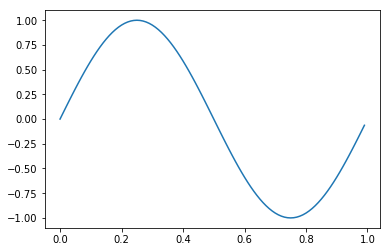

In [3]:
freq = 1.0 # Frequency
x = np.arange(0.0, 1.0, 0.01) # Min, Max, Step
y = [np.sin(2 * np.pi * freq * i) for i in x]

plt.plot(x,y)
plt.show()

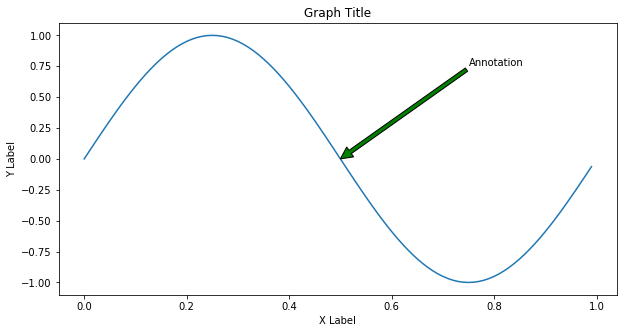

In [4]:
plt.figure(figsize=(10,5));
ax = plt.subplot(1,1,1)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Graph Title')
plt.plot(x,y)
ax.annotate('Annotation', xy=(0.5, 0.0), xytext=(0.75, 0.75),
            arrowprops={'facecolor':'green'},
            )
plt.show()

# Subplots <a class="anchor" id="subplots"/>

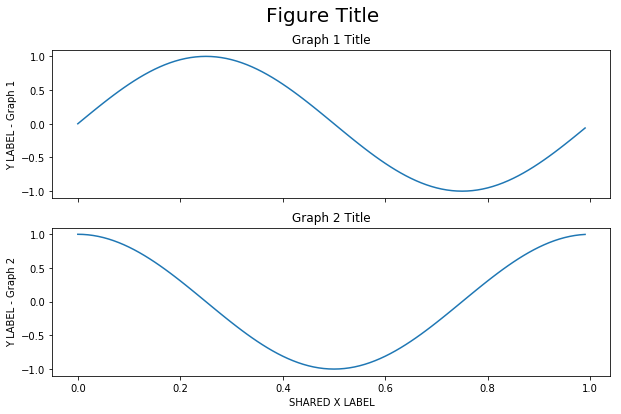

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,6))
y = [np.sin(2 * np.pi * freq * i) for i in x]
axes[0].plot(x,y)
y = [np.cos(2 * np.pi * freq * i) for i in x]
axes[1].plot(x,y)

plt.suptitle('Figure Title', fontsize=20, horizontalalignment='center', verticalalignment='top')

axes[0].set_title('Graph 1 Title')
axes[1].set_title('Graph 2 Title')
axes[1].set_xlabel('SHARED X LABEL')
axes[0].set_ylabel('Y LABEL - Graph 1')
axes[1].set_ylabel('Y LABEL - Graph 2')
plt.show()

# Interactive Graph with ipywidgets <a class="anchor" id="ipyw"/>

In [6]:
from ipywidgets import interact, interactive, fixed, IntSlider, Dropdown

In [7]:
def display_graph(func, freq=1.0):
    x = np.arange(0.0, 1.0, 0.01) # Min, Max, Step
    y = [func(2 * np.pi * freq * i) for i in x]
    plt.plot(x,y)
    plt.show()

In [8]:
dd = Dropdown(options={'Sine':np.sin,'Cosine':np.cos})
# Set continuous_update=False so that we're not consuming resources constantly
# by updating the graph when the slider is moved. Only update when it's released.
fs = IntSlider(min=1, max=10, step=1, continuous_update=False)
interact(display_graph, func=dd, freq=fs);

A Jupyter Widget

# Style Sheets <a class="anchor" id="ss"/>
Matplotlib has several different predefined styles to make your graph look pretty. You can set it permanently by calling:
```
plt.style.use('stylename')
```

If you'd prefer to set it temporarily for a single graph you can use a context:
```
with plt.syle.context('stylename'):
    plot_something()
```

The following code allows you to see all of the different styles currently available and change them.

In [9]:
def graph_with_style(style_name):
    x = np.arange(0.0, 1.0, 0.01) # Min, Max, Step
    y = [np.sin(2 * np.pi * 2 * i) for i in x]
    with plt.style.context(style_name):
        plt.plot(x,y)
        plt.show()

In [10]:
dd = Dropdown(options=plt.style.available)
# Set continuous_update=False so that we're not consuming resources constantly
# by updating the graph when the slider is moved. Only update when it's released.
interact(graph_with_style, style_name=dd);

A Jupyter Widget

## Creating Your Own Style Sheet
Matplotlib allows you to define your own style sheets in an mplstyle file in the matplotlib config directory. It follows the same format as a [https://matplotlib.org/users/customizing.html#matplotlibrc-sample](matplotlib rc file).

You can determine what your configuration directory is set to by using:
```
matplotlib.get_configdir()
```

For example *my_style.mplstyle*:
```
text.color : red
axes.facecolor : green
ytick.color : pink
xtick.color : brown
lines.linewidth : 2
legend.loc : best
```

# Graphing with Pandas <a class="anchor" id="pandas"/>
Pandas is built on top of matplotlib. Because of this it allows us to call plotting methods directly from our DataFrames plot property.

We'll take a look at some graph types here but to view a full list of what pandas is capable of refer to their documentation here: [http://pandas.pydata.org/pandas-docs/stable/visualization.html](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

## Line Plot

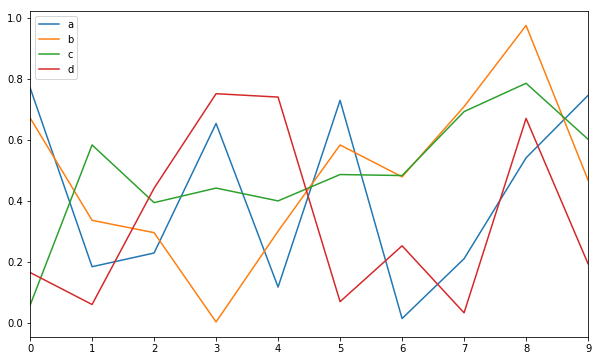

In [11]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot(figsize=(10,6))

## Histogram
There are two different methods to generate histogram graphs.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1175d2e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11776b7f0>]], dtype=object)

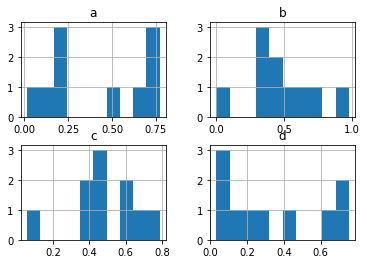

In [12]:
# Handy Jupyter Notebook tip:
# - Add a semicolon to the end of the line to avoid returning extra information
# - Alternatively you can use the special _ variable and #set that to your graph.
# iris.hist();
# _ = iris.hist()
plt.figure(figsize=(10,6))
df.hist()

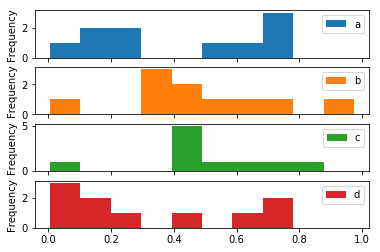

In [13]:
df.plot.hist(subplots=True);

## Area plot

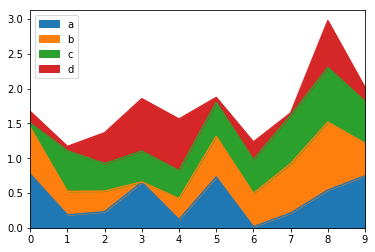

In [14]:
df.plot.area();

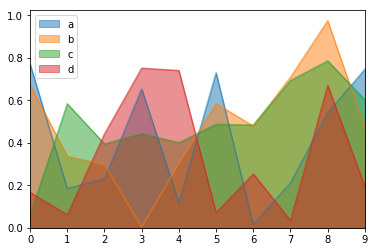

In [15]:
df.plot.area(stacked=False);

## Bar Plots

### Vertical

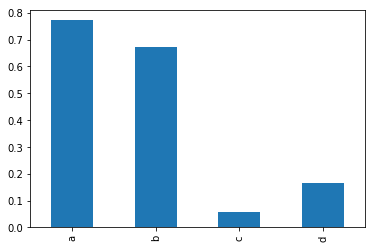

In [16]:
df.iloc[0].plot.bar();

### Horizontal

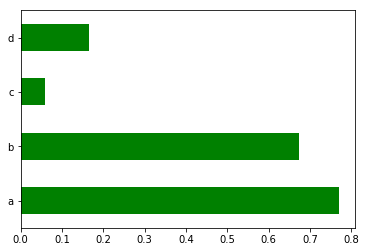

In [17]:
df.iloc[0].plot.barh(color='green')

## Kernel Density Estimation
*A non-parametric way to estimate the probability density function of a random variable*

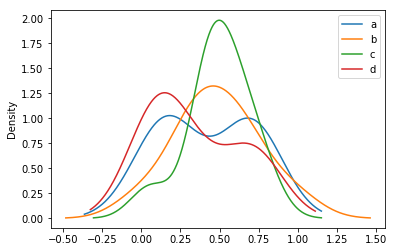

In [18]:
ax = df.plot.kde();

## Pie Chart

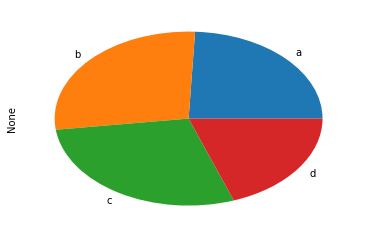

In [19]:
df.sum().plot.pie()

## Scatter Plot

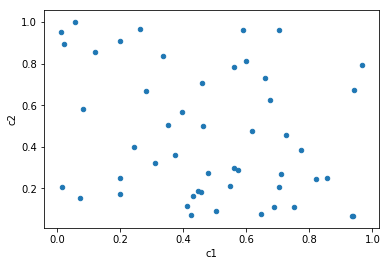

In [20]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['c1', 'c2', 'c3', 'c4'])
df.plot.scatter(x='c1', y='c2');

We can also plot multiple graphs within the same image or Axes. The pandas plot function will return the Axes object used to create the plot. You can then pass that into future plots to combine them.

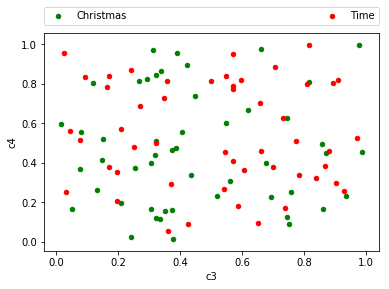

In [21]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['c1', 'c2', 'c3', 'c4'])

# Because we're plotting two seprate pieces of data we need to make sure we specify a color and a label 
#   otherwise they look like the same data!
ax = df.plot.scatter(x='c1', y='c2', color='green', label='Christmas');
df.plot.scatter(x='c3', y='c4', ax=ax, color='red', label='Time');

#Let's also get fancy and put the legend atop the graph.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='upper left',
           ncol=2, # Number of columns to use
           mode="expand", borderaxespad=0.0);

## Hexbin
*Useful alternative to scatter plots if you have very dense data*

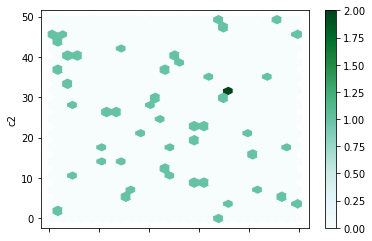

In [22]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['c1', 'c2', 'c3', 'c4'])
df['c2'] = df['c2'] + np.arange(50)
df.plot.hexbin(x='c1', y='c2', gridsize=25);

# Seaborn
*If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.*

These include:
- Using default themes that are aesthetically pleasing ("pretty")
- Setting and using custom color pallete
- Making attractive statistical plots

API Reference:
http://seaborn.pydata.org/api.html

Seaborn is a **complement**, not a substitute for Matplotlib. Some tweaks to visualizations still require Matplotlib.



In [23]:
import seaborn as sns

iris = sns.load_dataset('iris')

### Pair Plots
Allows us to compare all combinations  separate features / attributes within a DataFrame by utilizing scatter plots.

Across the diagonal are histograms of each feature.

#### The Really Long Way

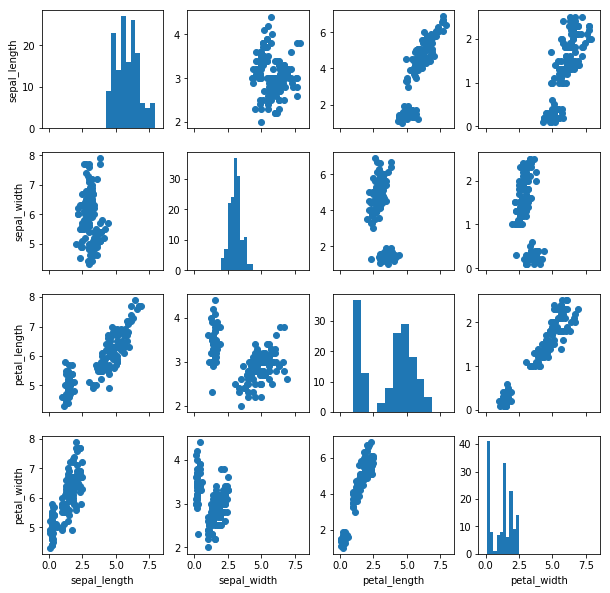

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, figsize=(10,10))
# Plot histograms across the diagonal
axes[0,0].hist(iris['sepal_length'])
axes[1,1].hist(iris['sepal_width'])
axes[2,2].hist(iris['petal_length'])
axes[3,3].hist(iris['petal_width'])

# Sepal Length scatter plots
axes[0,1].scatter(iris['sepal_length'], iris['sepal_width'])
axes[0,2].scatter(iris['sepal_length'], iris['petal_length'])
axes[0,3].scatter(iris['sepal_length'], iris['petal_width'])


# Sepal Width scatter plots
axes[1,0].scatter(iris['sepal_width'], iris['sepal_length'])
axes[1,2].scatter(iris['sepal_width'], iris['petal_length'])
axes[1,3].scatter(iris['sepal_width'], iris['petal_width'])


# Petal Length scatter plots
axes[2,0].scatter(iris['petal_length'], iris['sepal_length'])
axes[2,1].scatter(iris['petal_length'], iris['sepal_width'])
axes[2,3].scatter(iris['petal_length'], iris['petal_width'])


# Petal Width scatter plots
axes[3,0].scatter(iris['petal_width'], iris['sepal_length'])
axes[3,1].scatter(iris['petal_width'], iris['sepal_width'])
axes[3,2].scatter(iris['petal_width'], iris['petal_length'])


# Set axis labels
axes[0,0].set_ylabel('sepal_length')
axes[1,0].set_ylabel('sepal_width')
axes[2,0].set_ylabel('petal_length')
axes[3,0].set_ylabel('petal_width')
axes[3,0].set_xlabel('sepal_length')
axes[3,1].set_xlabel('sepal_width')
axes[3,2].set_xlabel('petal_length')
axes[3,3].set_xlabel('petal_width')

plt.show()

#### The shorter pandas way

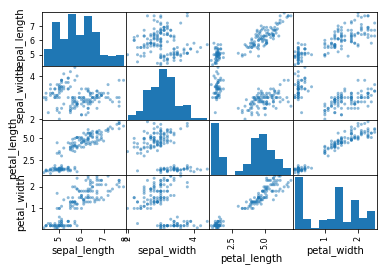

In [25]:
pd.plotting.scatter_matrix(iris);

#### With Seaborn

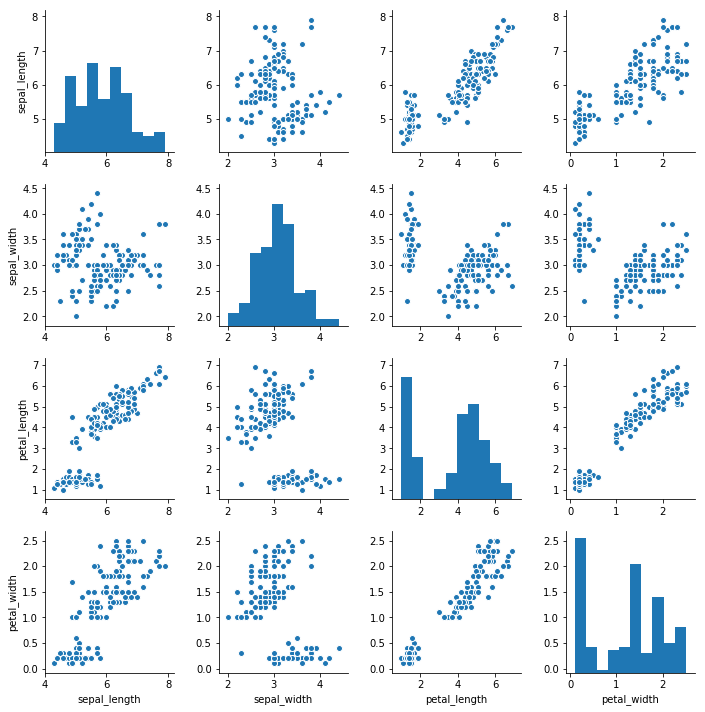

In [26]:
sns.pairplot(iris);

### Swarm Plots and Custom Palettes

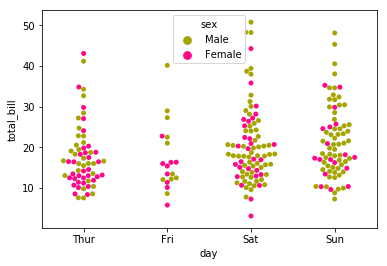

In [27]:
tips = sns.load_dataset('tips')

colors = ['puke', 'strong pink'] # http://xkcd.com/color/rgb/
pal = sns.xkcd_palette(colors)
with sns.color_palette(pal):
    sns.swarmplot(data=tips, x="day", y="total_bill", hue="sex")
    # Let's save this graph as an image since it's so beautiful.
    plt.savefig('puke_pink.png');

In [28]:
%%HTML
<img src="puke_pink.png"/>

## Pokemon Example

In [29]:
df = pd.read_csv('data/Pokemon.csv', index_col=0)
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


### Scatter Plots

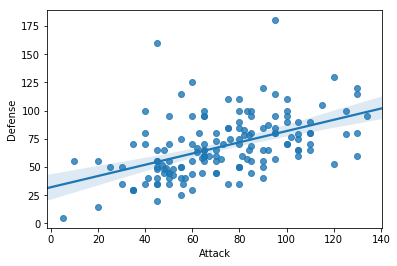

In [30]:
sns.regplot(x='Attack', y='Defense', data=df);

Seaborn doesn't have a a specific scatter plot function so instead we're can utilize the lmplot or regplot function and pass in the *fit_reg=False* argument to remove the linear regression lines giving us a scatter plot. 

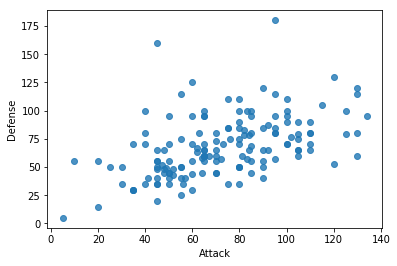

In [31]:
sns.regplot(x='Attack', y='Defense', data=df, fit_reg=False);

We can even add hues to the scatterplot to color based on another feature.

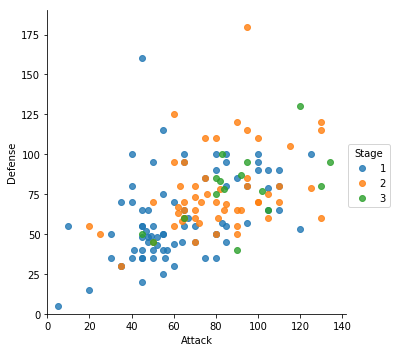

In [32]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage');
 
# Tweak the limits of the graph using Matplotlib
plt.ylim(0, None);
plt.xlim(0, None);

### Boxplots (Box and Whisker Plots)
Creates a graph showing boxes with lines extending out from the boxes ("whiskers"). The box represents the quartiles (25th, 50th/median and 75th). The whiskers extend out by default to 1.5 * IQR (Interquartile Range -- 75th-25th)

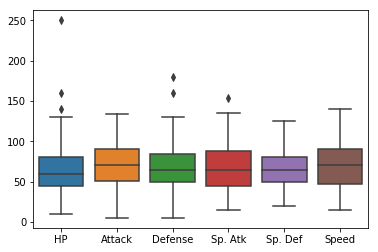

In [33]:
# Only use the features we're interested in and drop the rest
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.boxplot(data=stats_df);


### Violin Plots
- They look like violins
- Good alternative to box plots
- Where boxplots only show summary statistics, violin plots additionally show distribution in the thickness of the violin

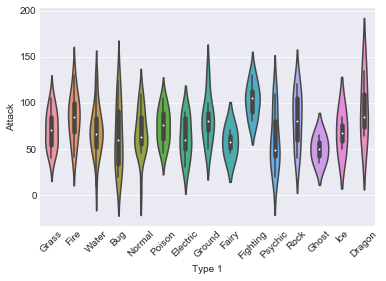

In [34]:
# Set theme
sns.set_style('darkgrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)
plt.xticks(rotation=45);

### Custom Palettes
This graph is nice but it would be easier to relate to each violin if the color reflected the type (for example Green for Grass). Luckily Seaborn allows us to define a customized palette to use.

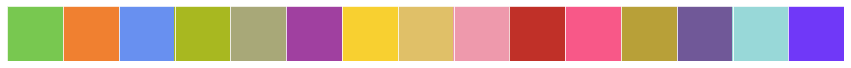

In [35]:
pokemon_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

# Let's visualize our newly customized color palette.
# We can use the handy seaborn palette plot method (palplot)
sns.palplot(pokemon_type_colors)

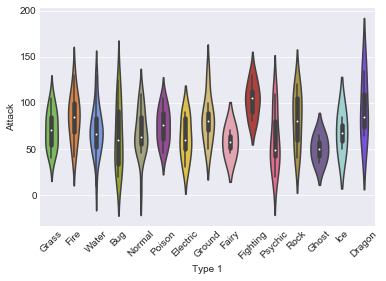

In [36]:
g = sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pokemon_type_colors) # Set color palette
plt.xticks(rotation=45); # rotate x-axis labels - Improve readability

Violin plots are good for showing a general overview of a dataset especially if there's a large amount of data. In this case since we only have 151 data points we could utilize a swamplot to get a more detailed picture. Even better would be to overlay a swarmplot on top of the violin plot.

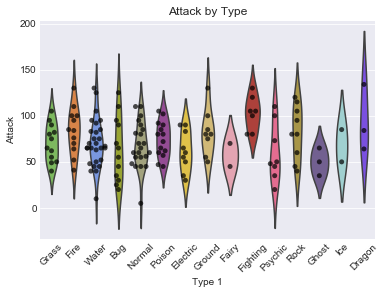

In [37]:
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pokemon_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type');
plt.xticks(rotation=45); # rotate x-axis labels - Improve readability

## Other Types of Graphs
### Heatmap
Helps you visualize matrix-like data

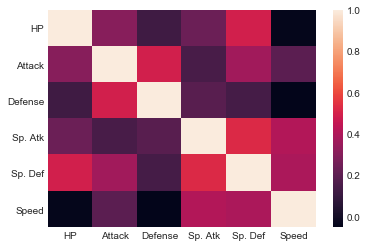

In [38]:
corr = stats_df.corr() # Get correlation data
sns.heatmap(corr);

### Histogram
Plot the distribution of numeric features broken down in different bins. Seaborn doesn't have a stand alone histogram method but we can use the distplot() for the same result.

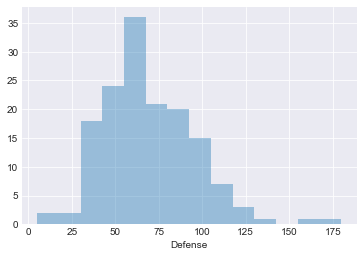

In [39]:
sns.distplot(
             df['Defense'], 
             kde=False # Hide the Kernel Density Estimate line
            );

### Bar Plot (Count Plot)
Visualize the distributions of categorical features

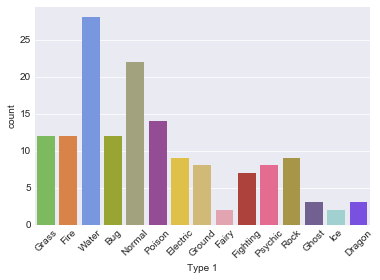

In [40]:
sns.countplot(x='Type 1', data=df, palette=pokemon_type_colors)
plt.xticks(rotation=45); # Rotate to improve readability

# Save our graph as an image!
plt.savefig('pokemon_count.png')

### Density Plot
Displays the distribution between two features. Also helpful when overlayed with a scatter plot.

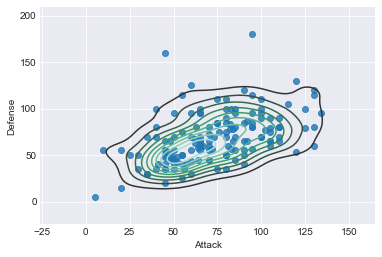

In [41]:
fig, ax = plt.subplots()
sns.kdeplot(df['Attack'], df['Defense'], ax=ax)
sns.regplot(x='Attack', y='Defense', data=df, fit_reg=False, ax=ax)

# Cartopy <a class="anchor" id="cartopy"/>
Cartopy is a useful tool which can allow you to plot geographical data onto an actual map.

As Cartopy is highly configurable we'll just take a quick peek at a very simple examples but you are encouraged to reivew the Cartopy documentation at [http://scitools.org.uk/cartopy/docs/latest/index.html](http://scitools.org.uk/cartopy/docs/latest/index.html)

NOTE: This package isn't included within the standard anaconda distribution. You'll need to install it manually using:
```
conda install cartopy
```

Matplotlib also has a related package called BaseMap however it is no longer actively developed and is only supported until 2020. Cartopy is the recommended replacement.

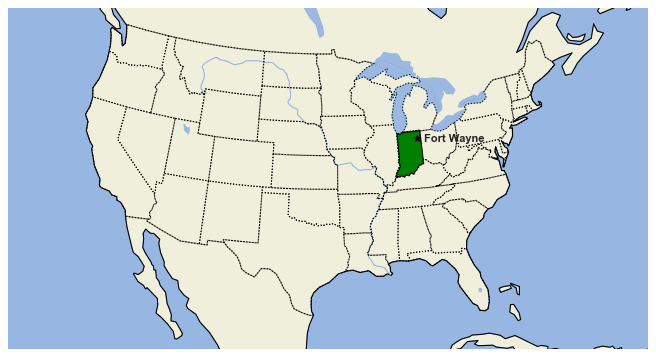

In [42]:
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from shapely.geometry import Point # Convert lat and long to shapely object to determine intersection

# Initialize our plotting figure to be 8 inches by 6 inches at 80 dpi
# - This correlates to 640x480 pixels
fig = plt.figure(figsize=(8,6), dpi=80)

# CRS = coordinate reference system
# - Methods to project the Earth's surgace onto the screen.

# Get the shape reader to determine the shape of each state from NaturalEarthData.com
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

east, west, north, south = -66.5, -125, 50, 20 # Narrow down our map

fw_lat, fw_lon = 41.079273, -85.139351
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

# Zoom into show only the United States by specifying a the latitude and longitudes
ax.set_extent([west, east, south, north], ccrs.Geodetic())

# to get the effect of having just the states without a map "background"
# turn off the outline and background patches
ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.95)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.STATES, linestyle=':')

plt.plot(fw_lon, fw_lat,
         color='black', linewidth=2, marker='*',
         transform=ccrs.Geodetic(),
         )

plt.text(fw_lon+.75, fw_lat-0.4, 'Fort Wayne', transform = ccrs.Geodetic(), weight='bold');
for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    # this will change if the storm intersects with our track
    facecolor = [0.9375, 0.9375, 0.859375]
    edgecolor = 'black'

    if state.intersects(Point(fw_lon, fw_lat)):
        facecolor = 'green'
        ax.add_geometries([state], ccrs.PlateCarree(),
                  facecolor=facecolor, edgecolor=edgecolor)
        


# Time Series <a class="anchor" id="timeseries"/>
[http://pandas.pydata.org/pandas-docs/stable/timeseries.html](http://pandas.pydata.org/pandas-docs/stable/timeseries.html)

Pandas has 4 different classes to represent time data:
* Timestamp - Represents a single timestamp
* DateTimeIndex - Index of Timestamp
* Period - Represents a single time span
* PeriodIndex - Index of Period

## DateTimeIndex
DateTimeIndex objects have all of the same features as a regular Index object however there are several additional performance enhancements for using a DateTimeIndex to represent time data.

Additional benefits include:
* You can access the date properties (year, month, day etc) quickly.
* Supports partial date slicing - Get data for a specific year
* Plotting with Pandas will automatically format dates on the axis labels

In [43]:
from pandas_datareader.data import DataReader
from datetime import datetime, timedelta

In [44]:
# Let's get stock data for the past year for Apple (AAPL)
end, start = datetime.today(), datetime.today() - timedelta(days=365)

# Utilize the pandas Data Reader to read stock quote from iex.
# Google and Yahoo used to provide this information as well 
#   however because of API changes and usage terms they have been deprecated
df_stocks = DataReader('AAPL', 'iex', start=start, end=end)
df_stocks.head()

2y


,open,high,low,close,volume
date,,,,,
2017-05-08,146.7090,151.3062,146.7090,150.6270,48752413
2017-05-09,151.4736,152.4679,151.0601,151.5917,39130363
2017-05-10,151.2373,151.5425,149.7410,150.8731,25805692
2017-05-11,150.6952,152.2966,150.5568,152.1779,27255058
2017-05-12,152.9193,154.6195,152.8897,154.3032,32527017


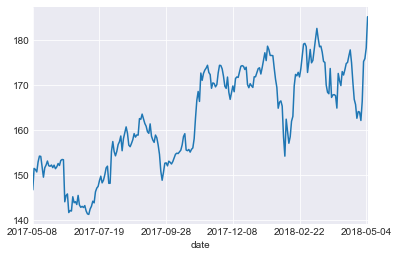

In [45]:
df_stocks['open'].plot();

In [46]:
df_stocks.index

Index(['2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
       '2017-05-15', '2017-05-16', '2017-05-17', '2017-05-18', '2017-05-19',
       ...
       '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-30',
       '2018-05-01', '2018-05-02', '2018-05-03', '2018-05-04', '2018-05-07'],
      dtype='object', name='date', length=252)

That's odd... The data we get back isn't in a TimeSeries. We can easily convert it.

In [47]:
df_stocks.index = pd.to_datetime(df_stocks.index)
df_stocks.index

DatetimeIndex(['2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11',
               '2017-05-12', '2017-05-15', '2017-05-16', '2017-05-17',
               '2017-05-18', '2017-05-19',
               ...
               '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27',
               '2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03',
               '2018-05-04', '2018-05-07'],
              dtype='datetime64[ns]', name='date', length=252, freq=None)

In [48]:
df_stocks.index.year

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='date', length=252)

## Slicing
Another benefit of DateTimeIndex objects is that you can do partial date string slicing.

For example if we wanted to look at the data from just this year:

In [49]:
df_stocks[str(datetime.now().year)].head()
# Alternatively df_stocks['2018']

,open,high,low,close,volume
date,,,,,
2018-01-02,169.4690,171.6003,168.5726,171.5605,25555934
2018-01-03,171.8294,173.8412,171.2617,171.5306,29517899
2018-01-04,171.8393,172.7655,171.3812,172.3273,22434597
2018-01-05,172.7357,174.6578,172.3472,174.2893,23660018
2018-01-08,173.6420,174.8968,173.2237,173.6420,20567766


In [50]:
# Alternatively look at data for just this month:
mask = str(datetime.now().year) + '-' + str(datetime.now().month)
df_stocks[mask].head()
# df['2018-4']

,open,high,low,close,volume
date,,,,,
2018-05-01,166.4102,169.20,165.2700,169.10,53569376
2018-05-02,175.2250,177.75,173.8000,176.57,66539371
2018-05-03,175.8800,177.50,174.4411,176.89,34068180
2018-05-04,178.2500,184.25,178.1700,183.83,56201317
2018-05-07,185.1800,187.67,184.7500,185.16,42451423


## Resample
The really neat thing with utilizing a datetime index (a TimeSeries) is you can easily resample your data so that you can aggregate your data based on a specific unit of time. In the example below we're using the end of the month but several more options are available under the offset documentation found at http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

In [51]:
resampled = df_stocks.resample('M').median()
resampled.head()

,open,high,low,close,volume
date,,,,,
2017-05-31,151.96050,152.46790,151.0601,151.84190,25805692.0
2017-06-30,144.63575,145.32275,143.3557,144.17115,26158643.5
2017-07-31,147.29480,148.45135,146.0295,147.55185,20527515.0
2017-08-31,157.85650,159.24590,156.8146,158.23740,26368528.0
2017-09-30,158.03520,158.64550,156.7922,157.43975,29073924.5


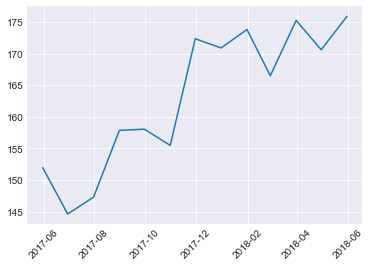

In [52]:
plt.plot(resampled['open']);
# Angle the X-axis labels for better readability
plt.xticks(rotation=45);
plt.show();

## Limitations
Since DateTime objects are represented as int64 integers to the nanosecond level the time span that can be represented is roughly 564 years

In [53]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

In [54]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')